### Fourier Series Analysis

*Lane Ellisor* 

*Last Edit: 18 March 2021* 

This notebook will seek to do 3 Main things 

- Analyse how an infinite series converges 
- Analyse the rates of convergence of certain series 
- Create an interactive interface for partial sums

These exercises come from R. Knobel's *Introduction to the Mathematical Theory of Waves*.

In [104]:
#Importing Modules
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import get_cmap
import scipy.integrate as integrate
import scipy.special as special
import sympy as sp
from matplotlib.widgets import Slider, Button, RadioButtons
from scipy.interpolate import UnivariateSpline
from ipywidgets import interactive, interact, fixed, interact_manual


**Exercise 14.2**

Find the Fourier sine series expansion on the interval $[0,1]$ for the functions a)$f(x) = x(1-x)$, b) $f(x) = 1 - cos(2\pi x)$. Compare the graphs of $f(x)$ and $f_3(x)$. 

a) The sine series approximation has been found to be $f(x) = \sum\limits_{n=1}^{\infty} \frac{sin(\pi n) - \pi n cos(\pi n)}{\pi^2 n^2} \cdot sin(n\pi x)$. Comparing the graphs of $f(x)$ and $f_3(x)$. 

Text(0.5, 1.0, '$f(x)=x(1-x)$ vs. partial sum $f_3(x)$')

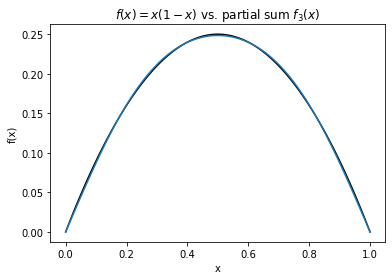

In [116]:
x = np.linspace(0,1, 100)
y_1 = x*(1-x)



N = 8
def a_n(n):
    return (2*np.pi*n*np.sin(np.pi*n)+4*np.cos(np.pi*n)-4)/(-1*(np.pi**3)*(n**3))
def back(x, n):
    return np.sin(n*np.pi*x)
def f_n(x, n):
    return a_n(n) * back(x, n)


def f_N(x, N):
    f = np.zeros_like(x)
    for i in range(1, N+1):
        f += f_n(x, i)
    return f
plt.plot(x, y_1,'k-' )
plt.plot(x, f_N(x,3))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('$f(x)=x(1-x)$ vs. partial sum $f_3(x)$')

It is clear that the series converges rather rapidly. 

b) We have found the function can be approximated as $f(x) = \frac{ncos(\pi n) +\pi n^2 - n -4\pi}{\pi(n^2-4)} \cdot sin(n\pi x)$.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


Text(0.5, 1.0, '$f(x)= 1- cos(2\\pi x)$ vs. partial sum $f_3(x)$')

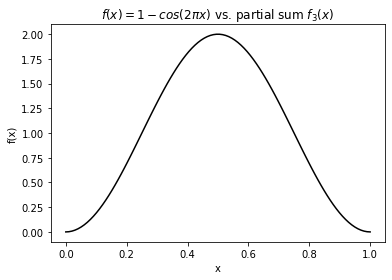

In [119]:
x = np.linspace(0,1, 100)
y_1 = 1-np.cos(2*np.pi * x)



N = 8
def a_n(n):
    return (n*np.cos(np.pi*n)+np.pi*n**2 - n-4*np.pi)/(np.pi*(n**2 -4))
def back(x, n):
    return np.sin(n*np.pi*x)
def f_n(x, n):
    return a_n(n) * back(x, n)


def f_N(x, N):
    f = np.zeros_like(x)
    for i in range(1, N+1):
        f += f_n(x, i)
    return f
plt.plot(x, y_1,'k-' )
plt.plot(x, f_N(x,3))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('$f(x)= 1- cos(2\pi x)$ vs. partial sum $f_3(x)$')

It is seen that the series will not converge after $N\approx 1.4$

**Exercise 14.3**

Find fourier expansion of $f(x)=x$ and graph the partial sums. At what values of $x$ does the series not converge?

In [129]:
def plotting(N):
    x = np.linspace(0,2, 2000)
    def a_n(n):
        return 2*(np.sin(np.pi*n)-np.pi*n*np.cos(np.pi*n)/(np.pi**2 * n**2))

    def back(x, n):
        return np.sin(n*np.pi*x)
             
    def f_n(x, n):
        return a_n(n) * back(x, n)


    def f_N(x, N):
        f = np.zeros_like(x)
        for i in range(1, N+1):
            f += f_n(x, i)
        return f
    
    plt.plot(x, f_N(x,N), N )
    plt.xlim(0,1.1)
    plt.ylim(0,1.5)
    plt.plot(x, x, 'k')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('$f(x) = x$ vs. $f_N(x)$')
interact(plotting, N=(0,25))

interactive(children=(IntSlider(value=12, description='N', max=25), Output()), _dom_classes=('widget-interact'…

<function __main__.plotting(N)>

**Exercise 14.4**

Write a Fourier Sine Series Expansion of 

a) $f(x) = sin(2 \pi x)$

b) $f(x) = x(1-x)$

c) $f(x) = x$

The coeficient $a_m$ is defined as

$ a_m = \frac{2}{L} \int_{0}^{L} f(s) \cdot sin(m\pi s / L) ds$

The fourier expansion is denoted

$f_N(x) = \sum\limits_{n=1}^{N} a_m sin(n\pi x/L)$

a) Expansion of $f(x)=sin(2\pi x)$ can be found to be $f(x) = \sum\limits_{n=1}^{\infty} \frac{4 sin(\pi n)}{\pi n^2 - 4\pi} sin(n\pi x) $

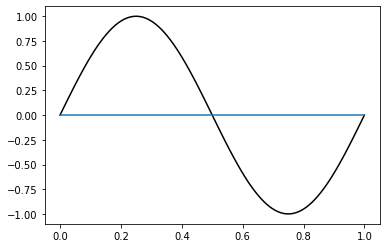

In [148]:
x = np.linspace(0,1, 100)
y_1 = np.sin(2*np.pi*x)


N = 8

def a_n(n):
    return 4*np.sin(np.pi *n)/(np.pi * (n**2) - 4*np.pi)
def back(x, n):
    return np.sin(n*np.pi*x)
def f_n(x, n):
    return a_n(n) * back(x, n)


def f_N(x, N):
    f = np.zeros_like(x)
    for i in range(1, N+1):
        f += f_n(x, i)
    return f

plt.plot(x, y_1,'k-' )
plt.plot(x, f_N(x, 1))

This series wont converge at all for $N$. 

The expansion of $f(x) = x(1-x)$ has already been analyzed.

In [146]:
def plotting(N):
    x = np.linspace(0,1, 2000)
    def a_n(n):
        return (2*np.pi*n*np.sin(np.pi*n)+4*np.cos(np.pi*n)-4)/(-1*(np.pi**3)*(n**3))

    def back(x, n):
        return np.sin(n*np.pi*x)
             
    def f_n(x, n):
        return a_n(n) * back(x, n)


    def f_N(x, N):
        f = np.zeros_like(x)
        for i in range(1, N+1):
            f += f_n(x, i)
        return f
    
    plt.plot(x, f_N(x,N), N)
    plt.xlim(0,1)
    plt.ylim(0,.3)
    plt.plot(x, x*(1-x), 'k')
    
interact(plotting, N=(0,5))

interactive(children=(IntSlider(value=2, description='N', max=5), Output()), _dom_classes=('widget-interact',)…

<function __main__.plotting(N)>

c) the function $f(x) = x$ has already been analysed. 

In [112]:
def plotting(N):
    x = np.linspace(0,2, 2000)
    def a_n(n):
        return 2*(np.sin(np.pi*n)-np.pi*n*np.cos(np.pi*n)/(np.pi**2 * n**2))

    def back(x, n):
        return np.sin(n*np.pi*x)
             
    def f_n(x, n):
        return a_n(n) * back(x, n)


    def f_N(x, N):
        f = np.zeros_like(x)
        for i in range(1, N+1):
            f += f_n(x, i)
        return f
    
    plt.plot(x, f_N(x,N), N )
    plt.xlim(0,1.1)
    plt.ylim(0,1.5)
    plt.plot(x, x, 'k')
interact(plotting, N=(0,15))

interactive(children=(IntSlider(value=7, description='N', max=15), Output()), _dom_classes=('widget-interact',…

<function __main__.plotting(N)>

**Exercise 14.6**

Using the BVP on pg. 109 construct and animate the solutions of $u(x,t)$ with partial sums for the following initial conditions 

a) $u(x,0) = x(1-x)$ and $u_t(x,0)=0$. 

b) $u(x,0) = 0$ and $u_t(x,0)=x(1-x)$. 